In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from tabulate import tabulate
from itertools import product

# Modelos de Machine Learning
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb

# Preprocesamiento
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Model Selection y Validación
from sklearn.model_selection import (
    train_test_split, cross_val_score, learning_curve, validation_curve
)

# Métricas
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, precision_score, recall_score, f1_score
)


In [43]:
data = pd.read_csv("../data/Propensity.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [44]:
# Mostrar las primeras filas para verificar la carga
data.head()

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,Campanna1,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,SI,NO,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,NO,NO,NO,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,NO,NO,NO,Medio,NO DATA,No,NO,1376,0,True,4,21,3
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,Madrid,SI,NO,NO,Medio,SI,Averia muy grave,SI,2015,7256,True,4,48,5
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,Santa Cruz de Tenerife,SI,NO,SI,Alto,NO DATA,No,NO,1818,0,True,3,21,3


# Explicación de las Columnas del CSV

### 1. **CODE**
   - **Descripción:** Identificador único para cada cliente.
   - **Objetivo en el análisis:** Permite identificar de manera individual a cada cliente en el dataset. No se utiliza en el análisis directo, pero puede ser útil para trazabilidad o registros.

### 2. **PRODUCTO**
   - **Descripción:** El tipo de producto comprado por el cliente.
   - **Objetivo en el análisis:** Estudiar el comportamiento de compra según el tipo de producto adquirido, permitiendo segmentar las preferencias del cliente.

### 3. **TIPO_CARROCERIA**
   - **Descripción:** Tipo de carrocería del coche adquirido (ej., Sedan, SUV).
   - **Objetivo en el análisis:** Identificar si existe una preferencia por ciertos tipos de carrocería entre los clientes.

### 4. **COMBUSTIBLE**
   - **Descripción:** Tipo de combustible del coche (ej., Gasolina, Diésel, Eléctrico).
   - **Objetivo en el análisis:** Evaluar si los clientes tienen preferencias por ciertos tipos de combustible y analizar posibles tendencias hacia opciones más ecológicas.

### 5. **Potencia**
   - **Descripción:** Potencia del motor del coche (en CV o kW).
   - **Objetivo en el análisis:** Estudiar las preferencias de los clientes en cuanto a la potencia del motor y cómo esto influye en la compra.

### 6. **TRANS**
   - **Descripción:** El tipo de financiamiento utilizado para la compra del coche (ej., Contado, Financiera Marca).
   - **Objetivo en el análisis:** Analizar cómo el tipo de financiamiento afecta las decisiones de compra y si existen patrones según este factor.

### 7. **FORMA_PAGO**
   - **Descripción:** Forma de pago elegida (ej., Contado, Financiera Marca).
   - **Objetivo en el análisis:** Evaluar las preferencias de pago y cómo influyen en la compra de vehículos.

### 8. **ESTADO_CIVIL**
   - **Descripción:** Estado civil del cliente (ej., Casado, Soltero, Otros).
   - **Objetivo en el análisis:** Analizar si el estado civil tiene alguna relación con las decisiones de compra de coches.

### 9. **GENERO**
   - **Descripción:** Género del cliente (M para masculino, F para femenino).
   - **Objetivo en el análisis:** Estudiar las diferencias entre géneros en las decisiones de compra y cómo el género influye en las preferencias del cliente.

### 10. **OcupaciOn**
   - **Descripción:** Ocupación del cliente (ej., Empresa, Funcionario).
   - **Objetivo en el análisis:** Estudiar cómo la ocupación del cliente puede influir en la compra de coches y qué tipo de clientes tienen más probabilidades de comprar.

### 11. **PROVINCIA**
   - **Descripción:** Provincia en la que reside el cliente.
   - **Objetivo en el análisis:** Analizar si existen variaciones regionales en las decisiones de compra de coches.

### 12. **Campanna1, Campanna2, Campanna3**
   - **Descripción:** Indicadores de si el cliente participó en diferentes campañas de marketing o promociones.
   - **Objetivo en el análisis:** Analizar el impacto de las campañas de marketing en las decisiones de compra de los clientes.

### 13. **Zona_Renta**
   - **Descripción:** La zona de renta del cliente (ej., Bajo, Medio, Alto).
   - **Objetivo en el análisis:** Evaluar cómo el poder adquisitivo de los clientes influye en la compra de coches.

### 14. **REV_Garantia**
   - **Descripción:** Estado de la garantía del coche (ej., Si, No Data).
   - **Objetivo en el análisis:** Estudiar si los clientes con garantía activa son más propensos a comprar un segundo coche.

### 15. **Averia_grave**
   - **Descripción:** Indicador de si el coche ha tenido alguna avería grave.
   - **Objetivo en el análisis:** Analizar cómo las averías graves afectan las decisiones de compra y si los clientes que han tenido averías están más inclinados a comprar un nuevo coche.

### 16. **QUEJA_CAC**
   - **Descripción:** Si el cliente ha presentado una queja ante el Centro de Atención al Cliente (CAC).
   - **Objetivo en el análisis:** Analizar la relación entre las quejas y la probabilidad de compra de un segundo coche.

### 17. **COSTE_VENTA**
   - **Descripción:** El coste de venta del coche.
   - **Objetivo en el análisis:** Evaluar cómo el coste del coche influye en la decisión de compra de un coche, y si existe una correlación con el poder adquisitivo.

### 18. **km_anno**
   - **Descripción:** Número de kilómetros recorridos anualmente por el coche.
   - **Objetivo en el análisis:** Estudiar si el kilometraje tiene algún impacto en las decisiones de compra, tanto en el primer coche como en la compra de un segundo coche.

### 19. **Mas_1_coche**
   - **Descripción:** Indicador de si el cliente ha comprado un segundo coche.
   - **Objetivo en el análisis:** Esta es la variable principal en el análisis, ya que el objetivo es estudiar qué factores están asociados a la compra de un segundo coche.

### 20. **Revisiones**
   - **Descripción:** Número de revisiones realizadas al coche.
   - **Objetivo en el análisis:** Analizar si la frecuencia de las revisiones del coche tiene alguna correlación con la compra de un segundo coche.

### 21. **Edad_Cliente**
   - **Descripción:** Edad del cliente.
   - **Objetivo en el análisis:** Evaluar si la edad del cliente influye en su decisión de compra, tanto para el primer coche como para un posible segundo coche.

### 22. **Tiempo**
   - **Descripción:** El tiempo transcurrido desde la compra del primer coche (en años).
   - **Objetivo en el análisis:** Analizar si el tiempo que ha pasado desde la compra del primer coche tiene algún impacto en la compra de un segundo coche.


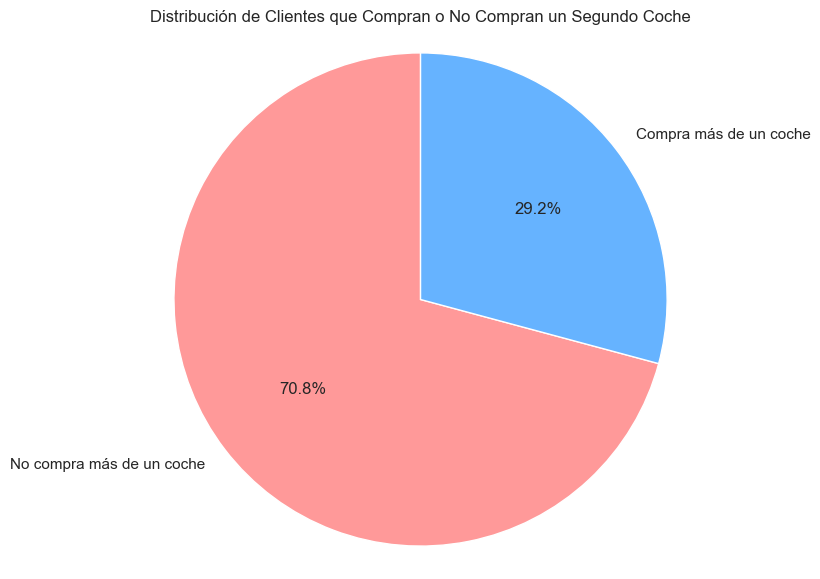

In [45]:
import matplotlib.pyplot as plt

# Calcular los porcentajes de las personas que compran más de un coche
purchase_counts = data['Mas_1_coche'].value_counts()
purchase_percentages = 100 * purchase_counts / purchase_counts.sum()

# Crear la gráfica de pastel
plt.figure(figsize=(7, 7))
plt.pie(purchase_percentages, labels=["No compra más de un coche", "Compra más de un coche"], autopct='%1.1f%%', startangle=90, colors=["#ff9999","#66b3ff"])

# Título y aspecto
plt.title("Distribución de Clientes que Compran o No Compran un Segundo Coche")
plt.axis('equal')  # Hace que el gráfico sea un círculo perfecto

# Mostrar la gráfica
plt.show()


# Explicación de la Gráfica de Compra de un Segundo Coche

La gráfica muestra la distribución de los clientes en función de si han comprado o no un segundo coche. Se utiliza un gráfico de tipo **tarta** o **pastel**, donde cada porción representa la proporción de clientes que han realizado una compra de un segundo coche frente a aquellos que no lo han hecho.

### Interpretación de la Gráfica

- **Compra de Segundo Coche (Sí):** Esta categoría representa a todos los clientes que han adquirido un segundo coche, es decir, aquellos cuyo valor en la columna "Mas_1_coche" es **True**.
  
- **No Compra de Segundo Coche (No):** Esta categoría representa a todos los clientes que no han adquirido un segundo coche, es decir, aquellos cuyo valor en la columna "Mas_1_coche" es **False**.

### Objetivo de la Gráfica

La finalidad de esta gráfica es **visualizar la proporción de clientes** que deciden comprar un segundo coche en comparación con los que no lo hacen. De esta manera, podemos obtener una representación visual rápida que facilite la identificación de patrones y tendencias en las decisiones de compra.

- Si una gran porción de la gráfica está ocupada por los clientes que compran un segundo coche, podría indicar que la adquisición de vehículos adicionales es una práctica común entre los compradores.
  
- Si la mayoría de la gráfica corresponde a aquellos que no compran un segundo coche, podría reflejar que la mayoría de los clientes se conforman con su primer vehículo o que existen barreras (económicas, de satisfacción, etc.) para la compra de un segundo coche.

### Implicaciones para el Análisis

Esta gráfica permite evaluar factores como:

- **Tendencias de compra repetitiva:** ¿Existen muchos clientes que, después de comprar un coche, vuelven a realizar una compra?
- **Segmentación de clientes:** ¿Qué tipo de clientes (en términos de edad, género, ocupación, etc.) están más propensos a adquirir un segundo coche?
- **Estrategias de marketing:** ¿Cómo podrían las empresas orientar sus campañas para incentivar la compra de un segundo coche?

### Conclusión

Esta representación gráfica ayuda a comprender mejor el comportamiento de los clientes en relación con la compra de un segundo coche, lo que puede ser útil para tomar decisiones comerciales, como la creación de ofertas personalizadas o la mejora de la fidelización de clientes.


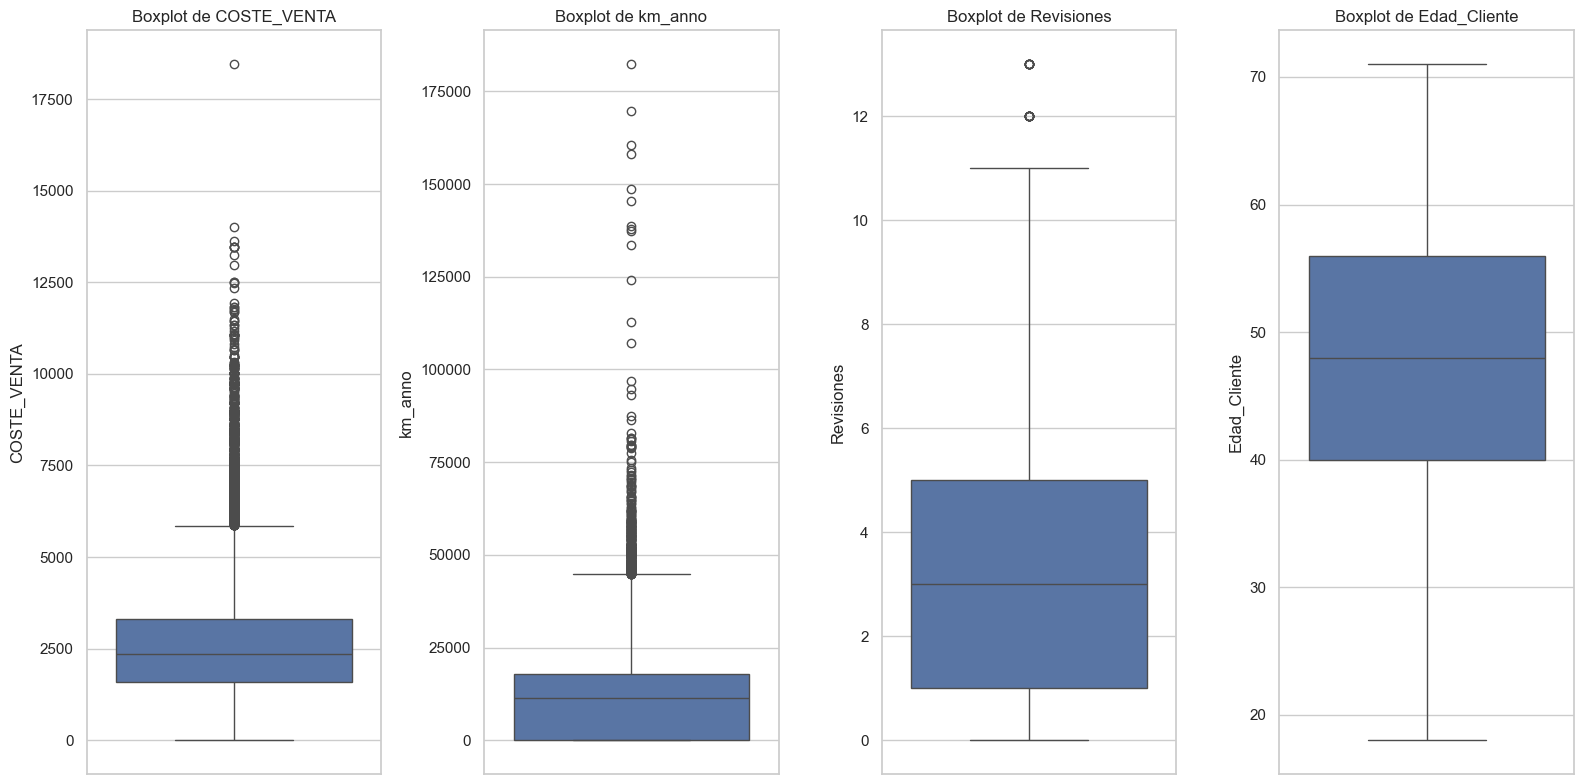

In [46]:
# Lista de columnas numéricas
num_cols = ["COSTE_VENTA", "km_anno", "Revisiones", "Edad_Cliente"]

# Crear una figura con 4 subgráficas (1 fila, 4 columnas)
plt.figure(figsize=(16, 8))

# Iterar sobre las columnas y crear un boxplot independiente para cada una
for i, col in enumerate(num_cols):
    plt.subplot(1, 4, i+1)  # (nrows, ncols, index)
    sns.boxplot(data=data[col])
    plt.title(f"Boxplot de {col}")
    plt.xticks(rotation=45)

plt.tight_layout()  # Ajustar los espacios entre subgráficas
plt.show()


# Explicación de los Boxplots

Los **boxplots** son gráficos que nos ayudan a entender la distribución de los datos y a identificar posibles problemas, como los valores atípicos.

### ¿Qué muestra un Boxplot?
- **La caja**: Representa la mayoría de los datos, mostrando donde se encuentran los valores centrales.
- **La línea dentro de la caja**: Es la **mediana**, que indica el valor central de los datos.
- **Los bigotes**: Muestran el rango de los datos que no son tan extremos.
- **Puntos fuera de los bigotes**: Son los **valores atípicos**, que son datos inusuales o diferentes al resto.

### Objetivo de la Gráfica

Cada boxplot nos ayuda a ver cómo se distribuyen los datos de cada columna:
- **COSTE_VENTA**: Muestra el precio de venta de los coches. Nos permite ver si la mayoría tiene precios similares o si algunos son mucho más caros o baratos.
- **km_anno**: Muestra los kilómetros que los coches recorren cada año. Algunos coches pueden tener un kilometraje muy alto o bajo.
- **Revisiones**: Nos dice cuántas veces se revisó el coche. Algunos coches pueden tener más revisiones que otros.
- **Edad_Cliente**: Muestra las edades de los clientes. Nos ayuda a ver si la mayoría de los clientes son de una edad similar o si hay clientes mucho más jóvenes o mayores.

### ¿Por qué es útil?
- Nos ayuda a ver si los datos están muy dispersos o si hay algo raro (como valores muy altos o bajos que no deberían estar ahí).
- Nos da una idea general de cómo se comportan los datos sin entrar en muchos detalles técnicos.

### Conclusión

Los boxplots son una forma sencilla de ver cómo están distribuidos los datos y detectar si hay algo fuera de lo común, como precios muy altos o coches con muchos kilómetros.


╒═════════════╤═════════════════════════════╤══════════════════════════╕
│ Age_Range   │  No compra más de un coche  │  Compra más de un coche  │
╞═════════════╪═════════════════════════════╪══════════════════════════╡
│ 18-30       │            75.50            │          24.50           │
├─────────────┼─────────────────────────────┼──────────────────────────┤
│ 31-40       │            72.36            │          27.64           │
├─────────────┼─────────────────────────────┼──────────────────────────┤
│ 41-50       │            69.71            │          30.29           │
├─────────────┼─────────────────────────────┼──────────────────────────┤
│ 51-60       │            69.23            │          30.77           │
├─────────────┼─────────────────────────────┼──────────────────────────┤
│ 61-70       │            71.94            │          28.06           │
├─────────────┼─────────────────────────────┼──────────────────────────┤
│ 71-80       │            77.03            │      

C:\Users\AulaDigital\AppData\Local\Temp\ipykernel_15484\486676660.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = data.groupby(['Age_Range', 'Mas_1_coche']).size().reset_index(name='Count')
C:\Users\AulaDigital\AppData\Local\Temp\ipykernel_15484\486676660.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_data = data.groupby('Age_Range').size().reset_index(name='Total')


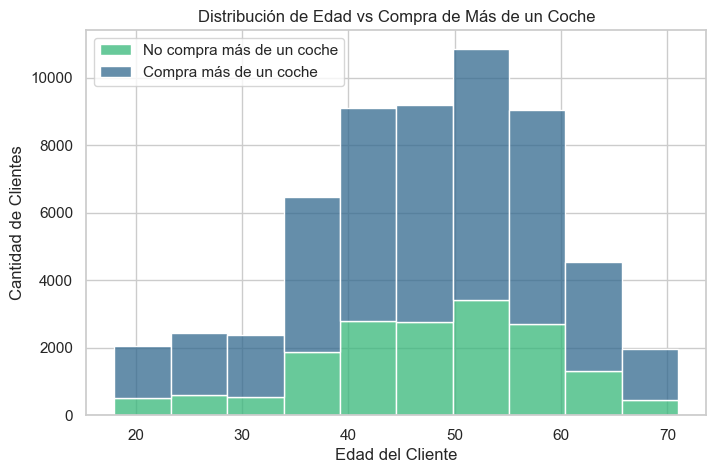

In [47]:
# Calcular la cantidad de clientes que compraron más de un coche y los que no, por cada rango de edad
# Utilizamos pd.cut() para crear los rangos de edad
age_bins = [18, 30, 40, 50, 60, 70, 80, 100]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-100']
data['Age_Range'] = pd.cut(data['Edad_Cliente'], bins=age_bins, labels=age_labels, right=False)

# Contar la cantidad de clientes por cada rango de edad y por si compraron más de un coche
count_data = data.groupby(['Age_Range', 'Mas_1_coche']).size().reset_index(name='Count')

# Calcular el total de clientes por cada rango de edad
total_data = data.groupby('Age_Range').size().reset_index(name='Total')

# Unir las dos tablas de cuenta y de totales
merged_data = pd.merge(count_data, total_data, on='Age_Range')

# Calcular el porcentaje de cada categoría en relación con el total por cada rango de edad
merged_data['Percentage'] = (merged_data['Count'] / merged_data['Total']) * 100

# Filtrar los rangos de edad que tienen al menos un cliente (eliminamos 81-100 si no tiene clientes)
merged_data = merged_data[merged_data['Total'] > 0]

# Crear la tabla de porcentajes
percentage_table = merged_data.pivot(index='Age_Range', columns='Mas_1_coche', values='Percentage')
percentage_table.columns = ['No compra más de un coche', 'Compra más de un coche']

# Mostrar la tabla de porcentajes con un estilo bonito usando `tabulate`
table_output = tabulate(percentage_table, headers='keys', tablefmt='fancy_grid', showindex=True, numalign="center", floatfmt=".2f")

print(table_output)

# Crear la gráfica de histograma
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="Edad_Cliente", hue="Mas_1_coche", multiple="stack", bins=10, palette="viridis")
plt.title("Distribución de Edad vs Compra de Más de un Coche")
plt.xlabel("Edad del Cliente")
plt.ylabel("Cantidad de Clientes")
plt.legend(["No compra más de un coche", "Compra más de un coche"])
plt.show()



# Explicación de la Gráfica: Edad del Cliente y Compra de Más de un Coche

### ¿Qué muestra la gráfica?

La gráfica nos muestra cómo se distribuyen los clientes según su **edad** y si **compraron más de un coche**. La barra de cada grupo de edad está dividida en dos colores:
- **Un color representa a los clientes que compraron más de un coche.**
- **Otro color muestra a los clientes que solo compraron un coche.**

### ¿Cómo se organiza la información?

1. **Rangos de Edad**: Se agruparon los clientes en rangos de edad (por ejemplo, 18-30, 31-40, etc.).
2. **Compra de Más de un Coche**: Para cada grupo de edad, vemos cuántos clientes compraron solo un coche y cuántos compraron más de uno.

### Objetivo de la Gráfica

El objetivo de esta gráfica es ver si hay alguna relación entre la edad de los clientes y si compran más de un coche. Por ejemplo:
- ¿Son los clientes más jóvenes los que compran más de un coche?
- ¿O son los clientes de mayor edad los que compran más coches?

### ¿Qué podemos ver?

- **Distribución de edades**: Los clientes se agrupan por rangos de edad, lo que nos ayuda a ver en qué grupos hay más clientes que compran más de un coche.
- **Comparación por colores**: El color de las barras nos muestra la proporción de clientes que compran más de un coche en comparación con los que solo compran uno. 
- **Tendencias**: Al observar la gráfica, podemos ver si los clientes más jóvenes o mayores tienen más probabilidades de comprar varios coches.

### Conclusión

La gráfica ayuda a entender mejor cómo la edad influye en las decisiones de compra, específicamente si los clientes deciden comprar más de un coche. A partir de ella, podemos tomar decisiones sobre estrategias de ventas dirigidas a diferentes grupos de edad.


                  No compra más de un coche  Compra más de un coche
FORMA_PAGO                                                         
Contado                           70.801590               29.198410
Financiera Banco                  66.198596               33.801404
Financiera Marca                  72.709974               27.290026
Otros                             68.997647               31.002353


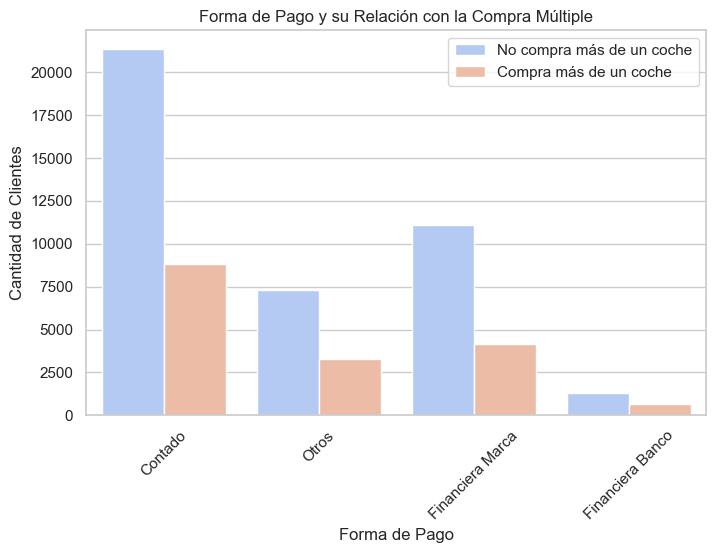

In [ ]:
# Calcular la cantidad de clientes que compraron más de un coche y los que no, por cada tipo de pago
count_data = data.groupby(['FORMA_PAGO', 'Mas_1_coche']).size().reset_index(name='Count')

# Calcular el total de clientes por cada tipo de pago
total_data = data.groupby('FORMA_PAGO').size().reset_index(name='Total')

# Unir las tablas de cuenta y de totales
merged_data = pd.merge(count_data, total_data, on='FORMA_PAGO')

# Calcular el porcentaje de cada categoría en relación con el total por tipo de pago
merged_data['Percentage'] = (merged_data['Count'] / merged_data['Total']) * 100

# Mostrar los porcentajes en formato de tabla
percentage_table = merged_data.pivot(index='FORMA_PAGO', columns='Mas_1_coche', values='Percentage')
percentage_table.columns = ['No compra más de un coche', 'Compra más de un coche']

print(percentage_table)

# Crear el gráfico countplot (sin mostrar los porcentajes en el gráfico)
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="FORMA_PAGO", hue="Mas_1_coche", palette="coolwarm")

# Configuración de la gráfica
plt.title("Forma de Pago y su Relación con la Compra Múltiple")
plt.xlabel("Forma de Pago")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=45)
plt.legend(["No compra más de un coche", "Compra más de un coche"])

plt.show()



# Explicación de la Gráfica: Forma de Pago y Compra de Más de un Coche

### ¿Qué muestra la gráfica?

Esta gráfica compara cómo se distribuyen los clientes que compran más de un coche según el **tipo de pago** que eligen. La barra de cada tipo de pago está dividida en dos colores:
- **Un color muestra a los clientes que no compraron más de un coche.**
- **Otro color representa a los clientes que compraron más de un coche.**

### ¿Cómo se organiza la información?

1. **Forma de Pago**: Los clientes están agrupados según el método que usaron para pagar su coche (por ejemplo, contado, financiación, etc.).
2. **Compra de Más de un Coche**: Dentro de cada forma de pago, se muestra cuántos clientes compraron solo un coche y cuántos compraron más de uno.

### Objetivo de la Gráfica

El objetivo de esta gráfica es ver si el **tipo de pago** influye en la decisión de **comprar más de un coche**. Queremos saber:
- ¿Los clientes que pagan al contado tienden a comprar más de un coche?
- ¿Los clientes que financian el coche compran más coches en general?

### ¿Qué podemos ver?

- **Distribución por forma de pago**: La gráfica nos muestra cuántos clientes usan cada tipo de pago y si compraron uno o más coches.
- **Comparación por colores**: Los colores en las barras nos indican qué proporción de clientes compra más de un coche y cuántos no.
- **Tendencias**: Al observar la gráfica, podemos ver si algún tipo de pago está asociado a la compra de más de un coche.

### Conclusión

Esta gráfica ayuda a entender cómo el **método de pago** puede estar relacionado con la **decisión de comprar más de un coche**. Esto puede ser útil para enfocar estrategias de ventas según el tipo de pago que elijan los clientes, para incentivar compras adicionales.


Porcentajes de compra de más de un coche por género:
╒══════════╤═════════════════════════════════╤══════════════════════════════╕
│ Género   │   No compra más de un coche (%) │   Compra más de un coche (%) │
╞══════════╪═════════════════════════════════╪══════════════════════════════╡
│ F        │                         72.137  │                      27.863  │
├──────────┼─────────────────────────────────┼──────────────────────────────┤
│ M        │                         70.3361 │                      29.6639 │
╘══════════╧═════════════════════════════════╧══════════════════════════════╛


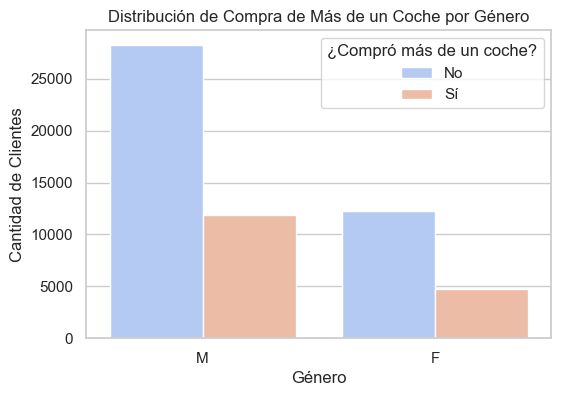

In [ ]:
# Calcular los porcentajes por cada categoría de GENRO y Mas_1_coche
total_counts = data.groupby(['GENERO', 'Mas_1_coche']).size().unstack(fill_value=0)  # Contar cada combinación de genero y compra
percentage_counts = total_counts.apply(lambda x: 100 * x / x.sum(), axis=1)  # Calcular porcentajes

# Crear la tabla de porcentajes
table = percentage_counts.reset_index()
table.columns = ['Género', 'No compra más de un coche (%)', 'Compra más de un coche (%)']

# Usar tabulate para hacer la tabla más bonita
formatted_table = tabulate(table, headers='keys', tablefmt='fancy_grid', showindex=False)

# Imprimir la tabla bonita
print("Porcentajes de compra de más de un coche por género:")
print(formatted_table)

# Crear la gráfica de barras agrupada
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=data, x="GENERO", hue="Mas_1_coche", palette="coolwarm")

# Personalizar la gráfica
plt.title("Distribución de Compra de Más de un Coche por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad de Clientes")
plt.legend(title="¿Compró más de un coche?", labels=["No", "Sí"])

# Mostrar la gráfica
plt.show()



# Explicación de la Gráfica: Compra de Más de un Coche por Género

### ¿Qué muestra la gráfica?

La gráfica muestra cómo se distribuyen los clientes que compraron más de un coche, según su **género**. Está representada con barras apiladas, donde cada barra representa el género de los clientes y se divide en dos partes:
- **Una parte de la barra muestra a los clientes que no compraron más de un coche.**
- **La otra parte muestra a los clientes que compraron más de un coche.**

### ¿Cómo se organiza la información?

1. **Género**: Los clientes están agrupados según su género (masculino o femenino).
2. **Compra de Más de un Coche**: Dentro de cada género, se muestra cuántos clientes compraron solo un coche y cuántos compraron más de uno.

### Objetivo de la Gráfica

El objetivo es observar si existe alguna diferencia entre **géneros** respecto a la **tendencia de comprar más de un coche**. Queremos ver si los hombres o las mujeres son más propensos a comprar múltiples coches.

### ¿Qué podemos ver?

- **Distribución por género**: La gráfica nos muestra cuántos hombres y cuántas mujeres compraron más de un coche.
- **Comparación entre géneros**: Las barras nos permiten ver si uno de los géneros tiene más clientes que compraron más de un coche que el otro.

### Conclusión

Este gráfico ayuda a entender si el **género** tiene alguna relación con la decisión de **comprar más de un coche**. Si uno de los géneros tiene una mayor proporción de clientes comprando más de un coche, las empresas podrían ajustar sus estrategias de venta y marketing.


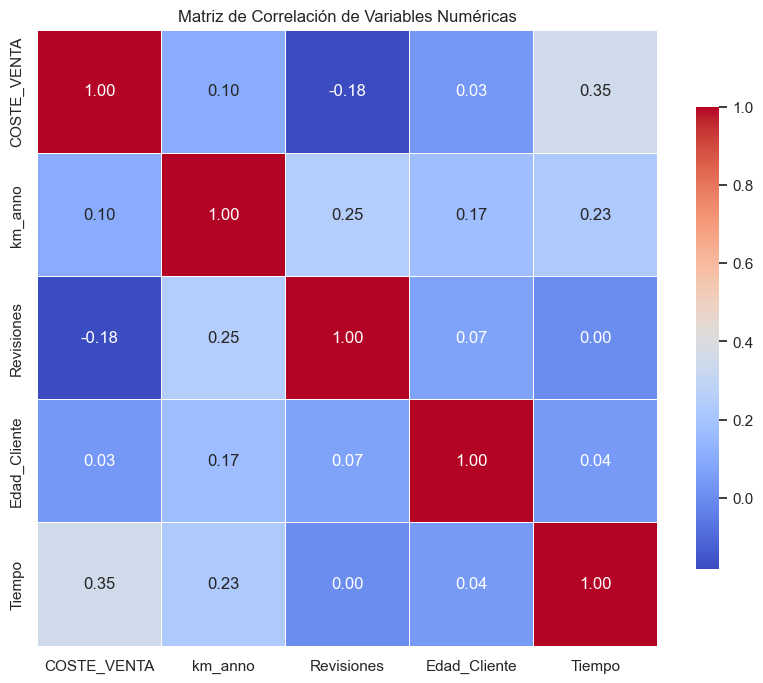

In [ ]:
# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calcular la matriz de correlación
correlation_matrix = data[numeric_columns].corr()

# Mostrar la matriz de correlación como un heatmap (mapa de calor)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.75})
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()



# Explicación de la Gráfica: Matriz de Correlación de Variables Numéricas

### ¿Qué muestra la gráfica?

La gráfica es una **matriz de correlación** visualizada como un **mapa de calor (heatmap)**, donde se muestra cómo se relacionan entre sí las **variables numéricas** dentro del conjunto de datos. 

Cada cuadro en la matriz muestra un valor que representa la **fuerza de la relación** entre dos variables. 

### ¿Cómo se interpreta?

- Los **valores cercanos a +1** indican una **correlación positiva fuerte**, es decir, cuando una variable aumenta, la otra también lo hace.
- Los **valores cercanos a -1** indican una **correlación negativa fuerte**, es decir, cuando una variable aumenta, la otra disminuye.
- Los **valores cercanos a 0** indican que **no hay relación** significativa entre las dos variables.

### Objetivo de la Gráfica

El objetivo de este mapa de calor es visualizar de manera rápida y fácil cómo se relacionan entre sí las variables numéricas de los datos. De esta manera, se puede identificar:
- **Relaciones positivas**: Variables que se comportan de forma similar.
- **Relaciones negativas**: Variables que se comportan de forma opuesta.
- **Ausencia de correlación**: Variables que no tienen una relación clara.

### ¿Qué podemos ver?

- Las **casillas en tonos cálidos** (más cercanas a 1) indican correlaciones positivas fuertes entre las variables.
- Las **casillas en tonos fríos** (más cercanas a -1) indican correlaciones negativas fuertes.
- **Casillas de color neutro** indican que no hay una relación clara entre las variables.

### Conclusión

La matriz de correlación es útil para:
- **Identificar variables redundantes**: Si dos variables están muy correlacionadas, una podría ser eliminada sin perder mucha información.
- **Entender las relaciones**: Puedes identificar qué variables podrían tener una relación directa o inversa, lo que podría ayudar en la modelización de datos o en la toma de decisiones.
